In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 1. 데이터 불러오기

In [2]:
BASE_DIR = './data'
train_path = os.path.join(BASE_DIR, 'train.csv')
test_path = os.path.join(BASE_DIR, 'test.csv')

In [3]:
data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
target = data['credit']

## 2. 데이터 살펴보기

데이터를 받으면 확인해야할 것

1. 컬럼 별 데이터의 형태 (Type)
2. 데이터 개수 (Shape)
3. 데이터 결측치 (Missing Value) 
4. 데이터 통계값 (Statistics)
5. 데이터의 분포 (Distribution)
6. 데이터의 예외값 (Outlier)

### 2-1. 데이터 대략적으로 이해하기

In [6]:
data.head().T

,0,1,2,3,4
index,0,1,2,3,4
gender,F,F,M,F,F
car,N,N,Y,N,Y
reality,N,Y,Y,Y,Y
child_num,0,1,0,0,0
income_total,202500.0,247500.0,450000.0,202500.0,157500.0
income_type,Commercial associate,Commercial associate,Working,Commercial associate,State servant
edu_type,Higher education,Secondary / secondary special,Higher education,Secondary / secondary special,Higher education
family_type,Married,Civil marriage,Married,Married,Married
house_type,Municipal apartment,House / apartment,House / apartment,House / apartment,House / apartment


- `index`: 인덱스
- `gender`: 성별
- `car`: 차량 소유 여부
- `reality`: 부동산 소유 여부
- `child_num`: 자녀 수
- `income_total`: 연간 소득
- `income_type`: 소득 분류
    - ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- `edu_type`: 교육 수준 
    - ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- `family_type`: 결혼 여부 
    - ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- `house_type`: 생활 방식
    - ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
- `DAYS_BIRTH`: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- `DAYS_EMPLOYED`: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
- `FLAG_MOBIL`: 핸드폰 소유 여부
- `work_phone`: 업무용 전화 소유 여부
- `phone`: 전화 소유 여부
- `email`: 이메일 소유 여부
- `occyp_type`: 직업 유형													
- `family_size`: 가족 규모
- `begin_month`: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- `credit`: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
    - => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

범주형과 수치형을 분류해서 살펴본다

In [7]:
for dt_idx, dt in zip(data.dtypes.index, data.dtypes) :
    print(dt_idx, dt)

index int64
gender object
car object
reality object
child_num int64
income_total float64
income_type object
edu_type object
family_type object
house_type object
DAYS_BIRTH int64
DAYS_EMPLOYED int64
FLAG_MOBIL int64
work_phone int64
phone int64
email int64
occyp_type object
family_size float64
begin_month float64
credit float64


In [8]:
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t=='O'] 
num_columns = [c for c in data.columns if c not in cat_columns]

print(f'Categorical Columns: \n{cat_columns}\n')
print(f'Numeric Columns: \n{num_columns}\n')

Categorical Columns: 
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

Numeric Columns: 
['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month', 'credit']



In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,26457.0,13228.000000,7637.622372,0.0,6614.0,13228.0,19842.0,26456.0
child_num,26457.0,0.428658,0.747326,0.0,0.0,0.0,1.0,19.0
income_total,26457.0,187306.524493,101878.367995,27000.0,121500.0,157500.0,225000.0,1575000.0
DAYS_BIRTH,26457.0,-15958.053899,4201.589022,-25152.0,-19431.0,-15547.0,-12446.0,-7705.0
DAYS_EMPLOYED,26457.0,59068.750728,137475.427503,-15713.0,-3153.0,-1539.0,-407.0,365243.0
FLAG_MOBIL,26457.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
work_phone,26457.0,0.224742,0.417420,0.0,0.0,0.0,0.0,1.0
phone,26457.0,0.294251,0.455714,0.0,0.0,0.0,1.0,1.0
email,26457.0,0.091280,0.288013,0.0,0.0,0.0,0.0,1.0
family_size,26457.0,2.196848,0.916717,1.0,2.0,2.0,3.0,20.0


In [10]:
data.describe(include='O').T

,count,unique,top,freq
gender,26457,2,F,17697
car,26457,2,N,16410
reality,26457,2,Y,17830
income_type,26457,5,Working,13645
edu_type,26457,5,Secondary / secondary special,17995
family_type,26457,5,Married,18196
house_type,26457,6,House / apartment,23653
occyp_type,18286,18,Laborers,4512


<AxesSubplot:>

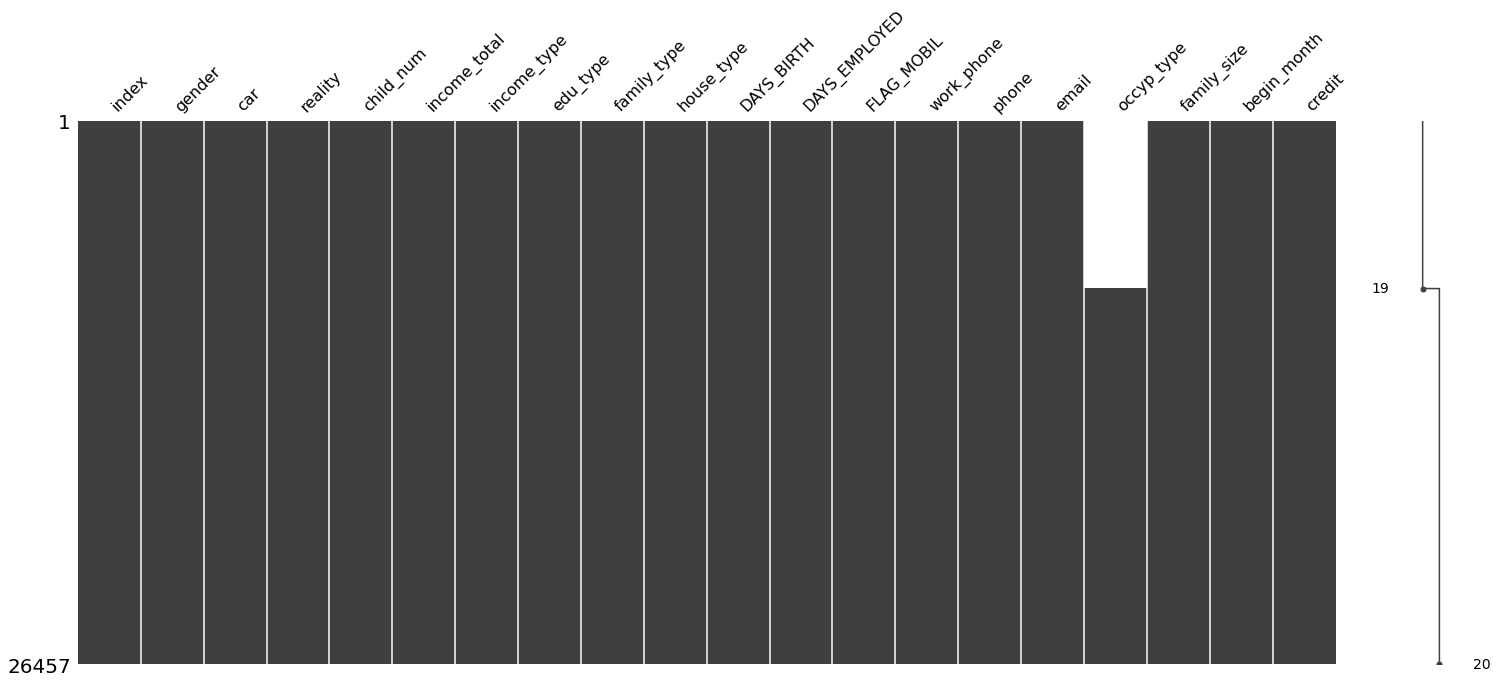

In [11]:
import missingno as msno

msno.matrix(data, sort = 'ascending')

In [12]:
data.isna().sum() / len(data) * 100

index             0.000000
gender            0.000000
car               0.000000
reality           0.000000
child_num         0.000000
income_total      0.000000
income_type       0.000000
edu_type          0.000000
family_type       0.000000
house_type        0.000000
DAYS_BIRTH        0.000000
DAYS_EMPLOYED     0.000000
FLAG_MOBIL        0.000000
work_phone        0.000000
phone             0.000000
email             0.000000
occyp_type       30.884076
family_size       0.000000
begin_month       0.000000
credit            0.000000
dtype: float64

occyp_type : 직업 유형

범주형과 수치형을 분류해서 살펴본다

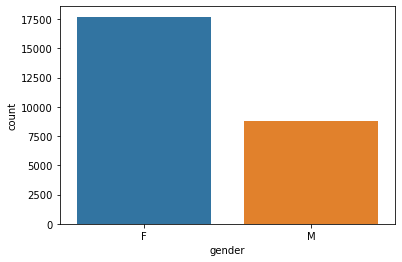

In [15]:
fig, ax = plt.subplots(1, 1)
sns.countplot(data = data, x = 'gender')
plt.show()

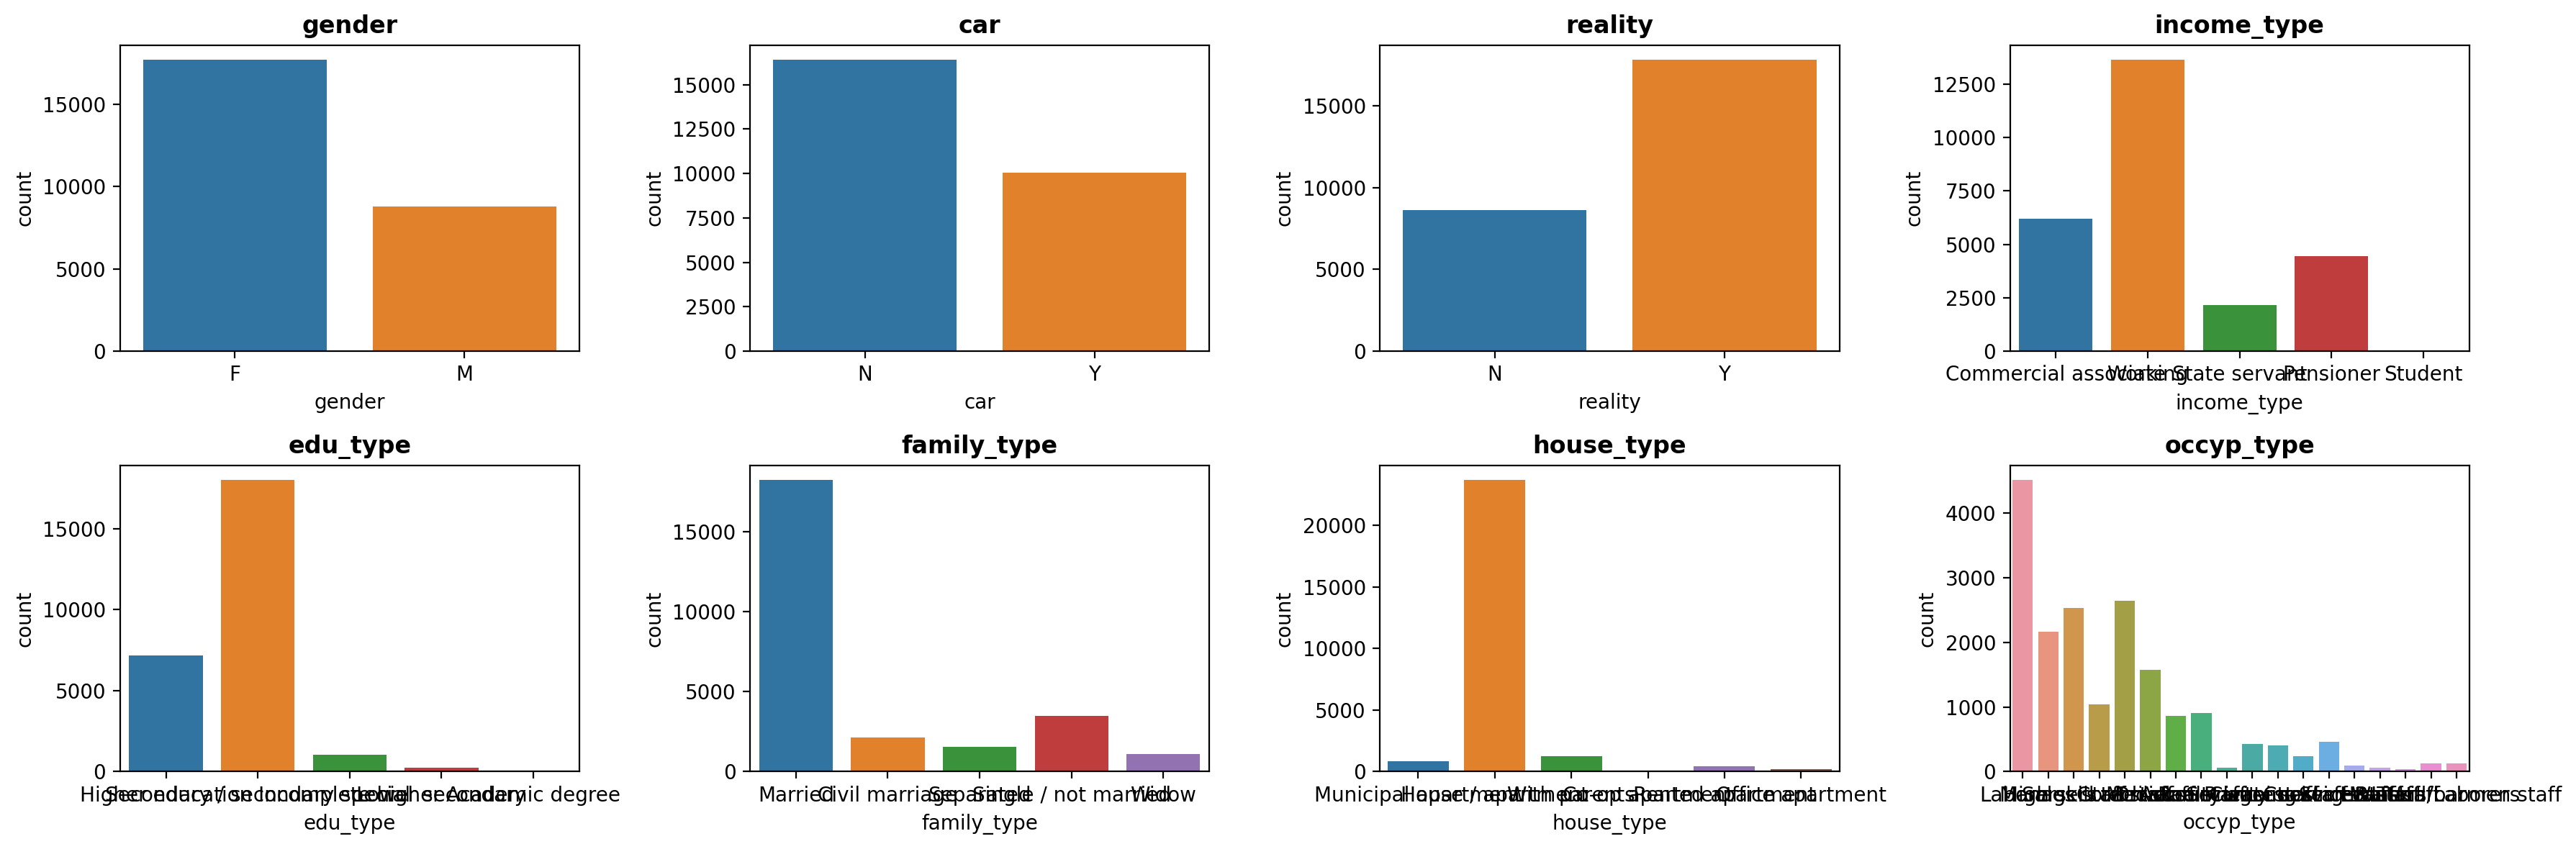

In [16]:
fig, ax = plt.subplots(2, 4, figsize = (18, 6), dpi = 200)
for col, ax in zip(cat_columns, ax.flatten()) :
    sns.countplot(data = data, x = col, ax = ax)
    ax.set_title(col, fontweight = 'bold')

fig.tight_layout()
plt.show()

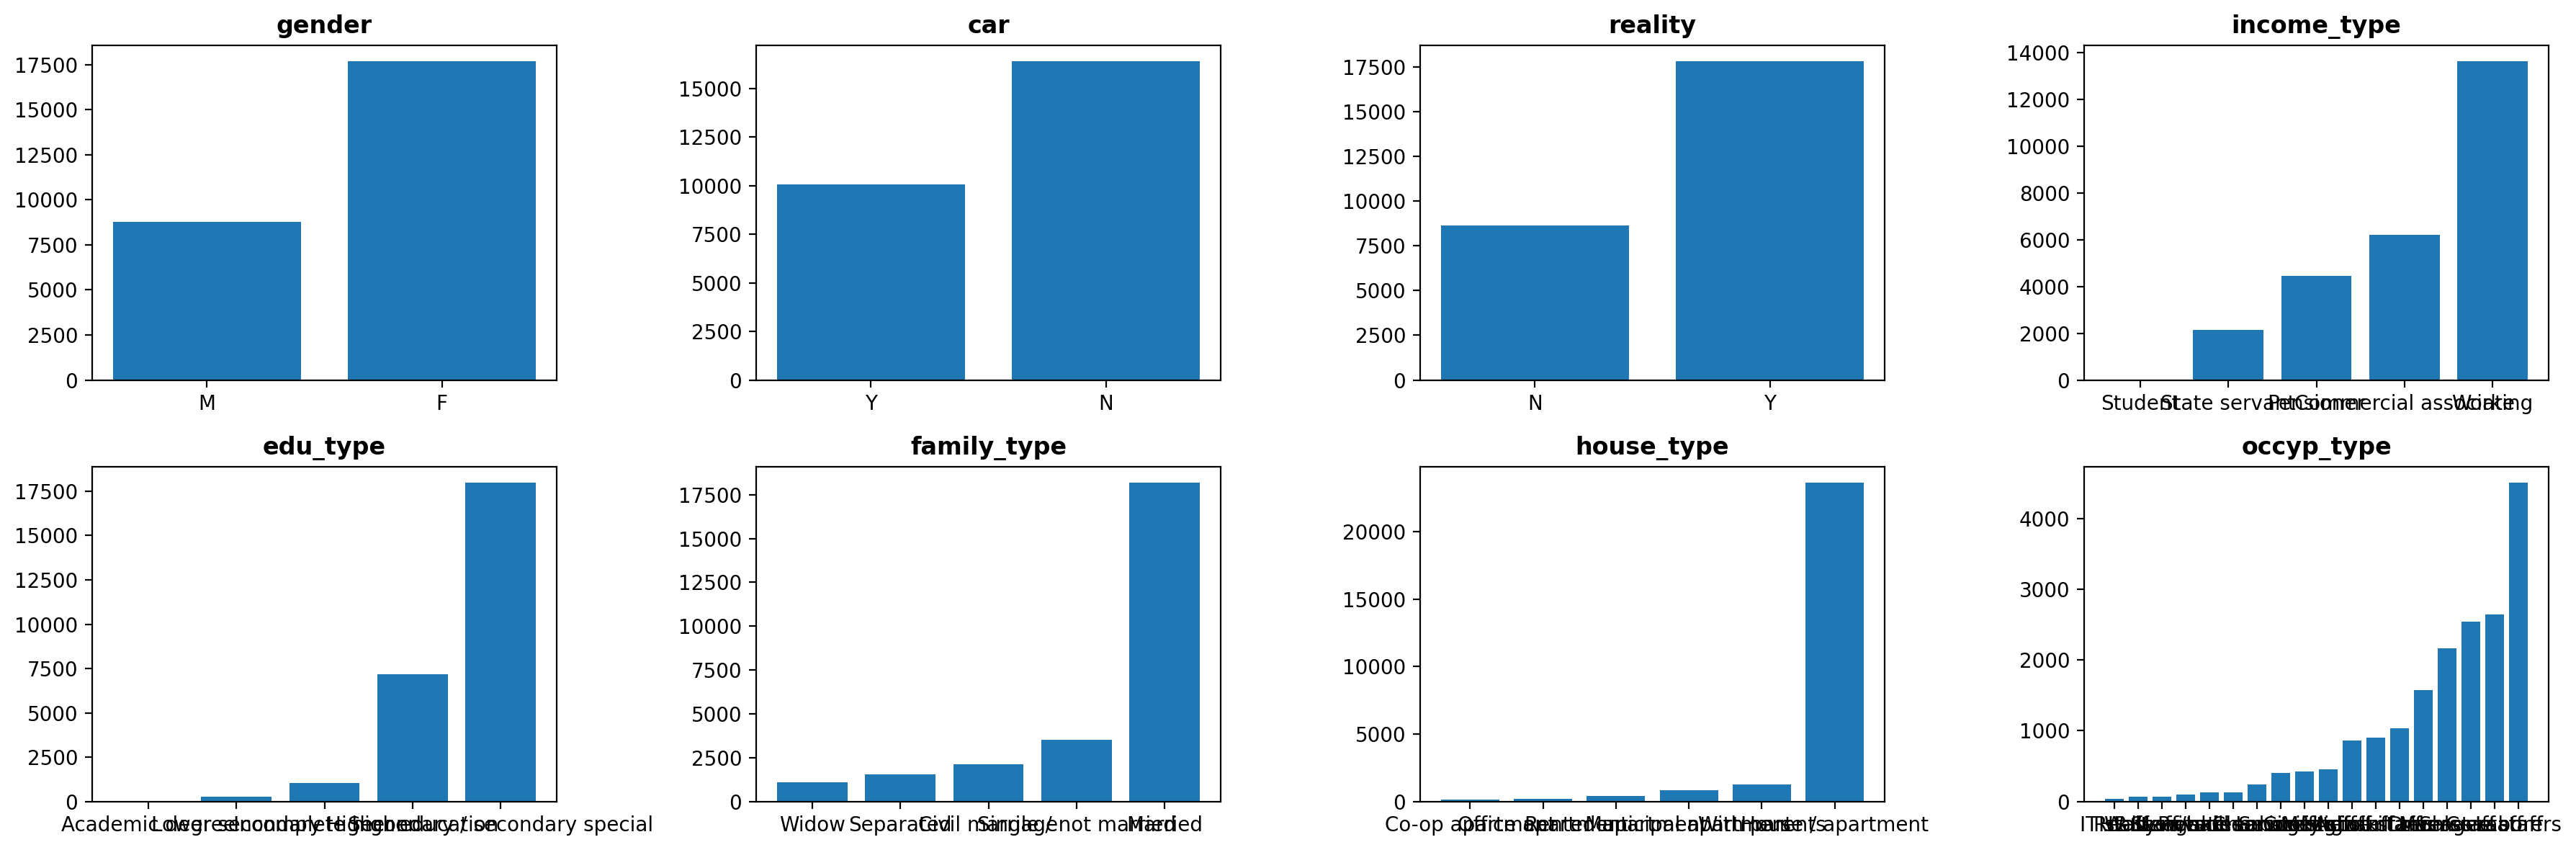

In [17]:
fig, ax = plt.subplots(2,4, figsize=(18,6), dpi = 200)
for col, ax in zip(cat_columns , ax.flatten()):
    tmp_cnt = data[col].value_counts().sort_values()
    ax.bar(tmp_cnt.index,tmp_cnt)
    ax.set_title(col, fontweight='bold')
#     sns.countplot(data=data, y=col, ax=ax)
#     ax.set_title(col, fontweight='bold')
    
fig.tight_layout()
plt.show()

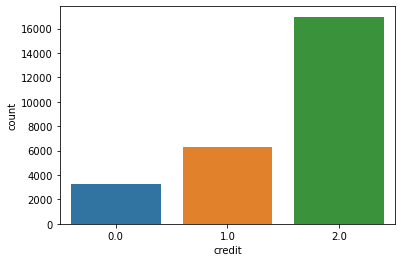

In [18]:
fig, ax = plt.subplots(1,1)
sns.countplot(data=data, x='credit')
plt.show()

In [19]:
data['credit'].value_counts().sort_values()

0.0     3222
1.0     6267
2.0    16968
Name: credit, dtype: int64

In [22]:
scaler = StandardScaler()
numeric_data = data[num_columns]
scaled_data = scaler.fit_transform(numeric_data)
scaled_data = pd.DataFrame(scaled_data, columns = num_columns)
scaled_data.head()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,-1.731985,-0.573599,0.149136,0.490075,-0.463930,0.0,-0.538417,-0.645705,-0.316937,-0.214735,1.215231,-0.739830
1,-1.731854,0.764529,0.590848,1.089621,-0.440878,0.0,-0.538417,-0.645705,3.155199,0.876135,1.275620,-0.739830
2,-1.731723,-0.573599,2.578550,-0.744719,-0.461929,0.0,-0.538417,1.548696,-0.316937,-0.214735,0.249003,0.684125
3,-1.731593,-0.573599,0.149136,0.207081,-0.444893,0.0,-0.538417,1.548696,-0.316937,-0.214735,-0.656836,-2.163785
4,-1.731462,-0.573599,-0.292575,0.219220,-0.444988,0.0,-0.538417,-0.645705,-0.316937,-0.214735,0.007446,0.684125


In [23]:
scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,26457.0,5.078399e-17,1.000019,-1.731985,-0.865993,0.000000,0.865993,1.731985
child_num,26457.0,-1.034034e-15,1.000019,-0.573599,-0.573599,-0.573599,0.764529,24.850844
income_total,26457.0,8.005171e-16,1.000019,-1.573539,-0.645944,-0.292575,0.369992,13.621338
DAYS_BIRTH,26457.0,8.393080e-17,1.000019,-2.188248,-0.826595,0.097835,0.835903,1.964307
DAYS_EMPLOYED,26457.0,1.378914e-16,1.000019,-0.543975,-0.452611,-0.440871,-0.432636,2.227162
FLAG_MOBIL,26457.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
work_phone,26457.0,1.437772e-15,1.000019,-0.538417,-0.538417,-0.538417,-0.538417,1.857295
phone,26457.0,-4.122559e-16,1.000019,-0.645705,-0.645705,-0.645705,1.548696,1.548696
email,26457.0,-6.303097e-16,1.000019,-0.316937,-0.316937,-0.316937,-0.316937,3.155199
family_size,26457.0,-3.448964e-17,1.000019,-1.305605,-0.214735,-0.214735,0.876135,19.420927


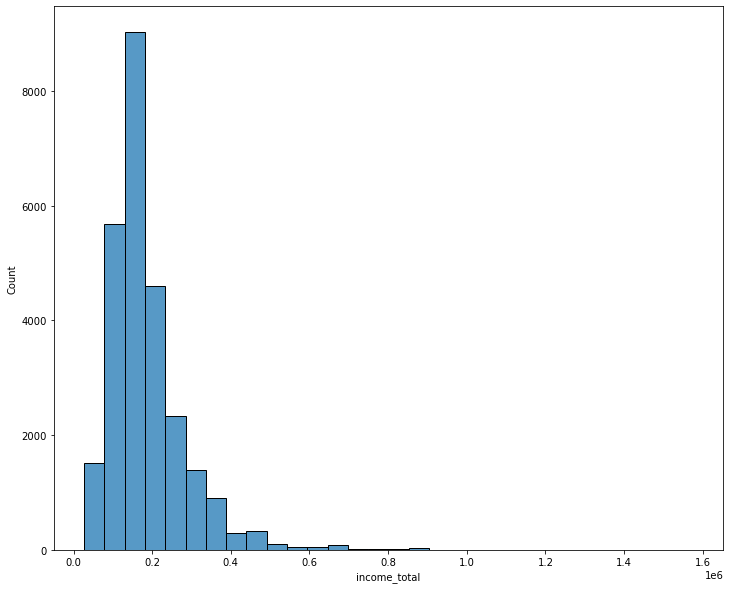

In [24]:
# 로그 변환 전
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
sns.histplot(data = data, x = 'income_total', bins = 30)
plt.show()

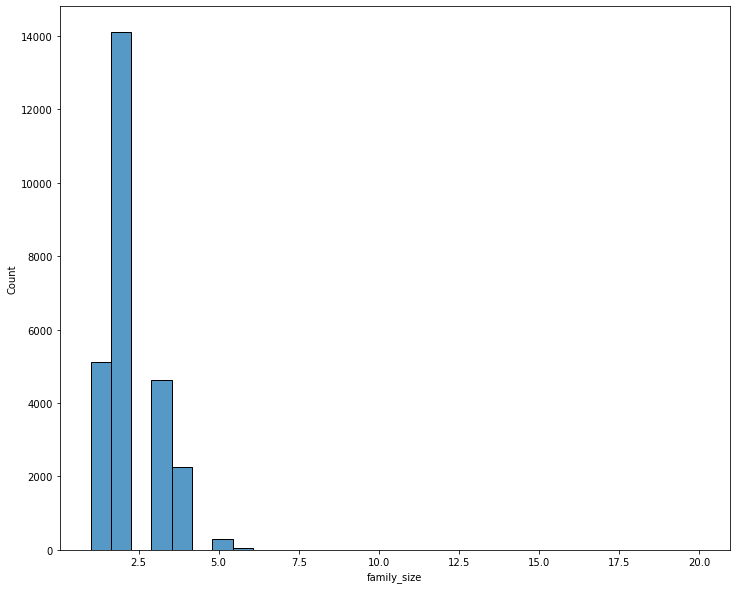

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
sns.histplot(data = data, x = 'family_size', bins = 30)
plt.show()

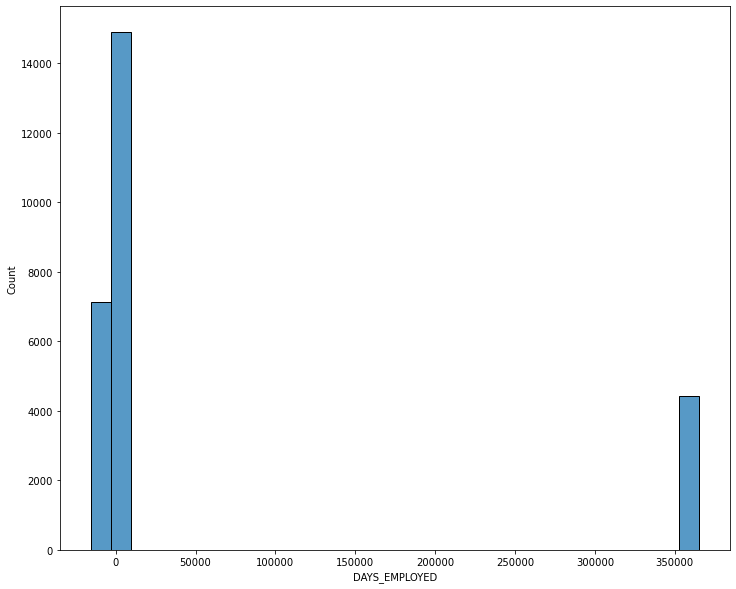

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
sns.histplot(data = data, x = 'DAYS_EMPLOYED', bins = 30)
plt.show()

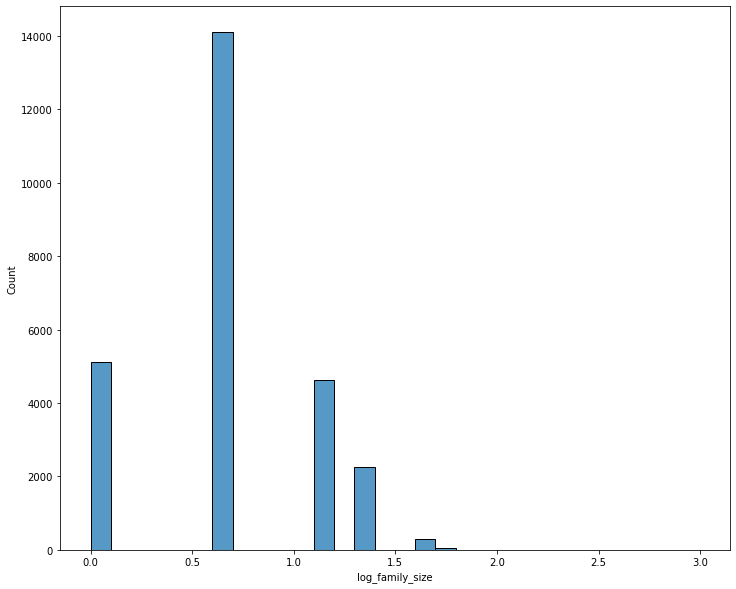

In [29]:
# 로그 변환 후
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
scaled_data['log_family_size'] = np.log(data['family_size'])
sns.histplot(data = scaled_data, x = 'log_family_size', bins = 30)
plt.show()

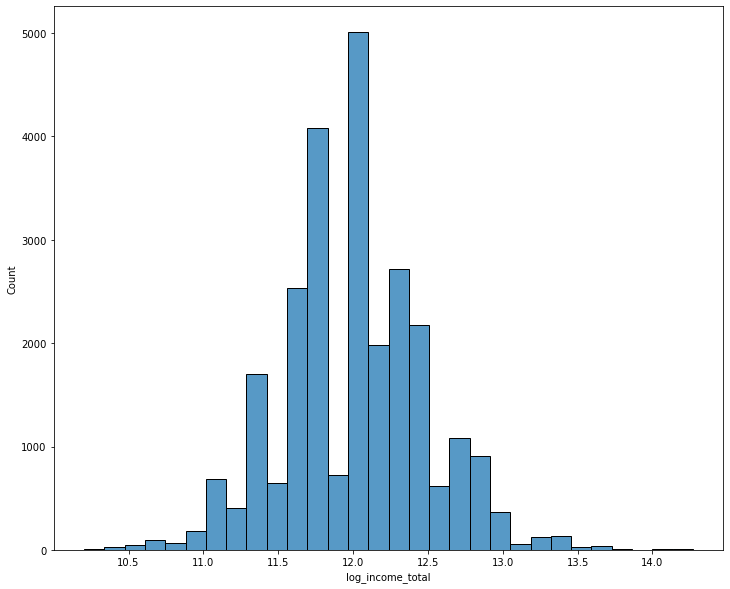

In [30]:
# 로그 변환 후
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
scaled_data['log_income_total'] = np.log(data['income_total'])
sns.histplot(data = scaled_data, x = 'log_income_total', bins = 30)
plt.show()

<AxesSubplot:>

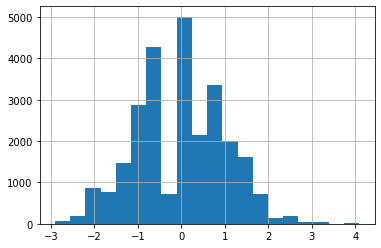

In [31]:
from sklearn.preprocessing import PowerTransformer

# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')

scaled_data['yeo_johnson_income_total'] = trans.fit_transform(scaled_data['income_total'].values.reshape(-1, 1))
scaled_data['yeo_johnson_income_total'].hist(bins=20)

<AxesSubplot:>

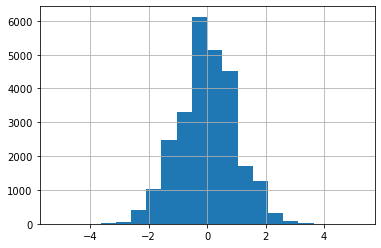

In [32]:
from sklearn.preprocessing import QuantileTransformer

# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')

scaled_data['quantile_income_total'] = trans.fit_transform(scaled_data['income_total'].values.reshape(-1, 1))
scaled_data['quantile_income_total'].hist(bins=20)

In [33]:
scaled_data

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,log_income_total,log_family_size,yeo_johnson_income_total,quantile_income_total
0,-1.731985,-0.573599,0.149136,0.490075,-0.463930,0.0,-0.538417,-0.645705,-0.316937,-0.214735,1.215231,-0.739830,12.218495,0.693147,0.469909,0.374936
1,-1.731854,0.764529,0.590848,1.089621,-0.440878,0.0,-0.538417,-0.645705,3.155199,0.876135,1.275620,-0.739830,12.419166,1.098612,0.879253,0.858910
2,-1.731723,-0.573599,2.578550,-0.744719,-0.461929,0.0,-0.538417,1.548696,-0.316937,-0.214735,0.249003,0.684125,13.017003,0.693147,1.964264,2.033104
3,-1.731593,-0.573599,0.149136,0.207081,-0.444893,0.0,-0.538417,1.548696,-0.316937,-0.214735,-0.656836,-2.163785,12.218495,0.693147,0.469909,0.374936
4,-1.731462,-0.573599,-0.292575,0.219220,-0.444988,0.0,-0.538417,-0.645705,-0.316937,-0.214735,0.007446,0.684125,11.967181,0.693147,-0.103179,-0.085414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,1.731462,2.102658,0.369992,0.923252,-0.444108,0.0,-0.538417,-0.645705,-0.316937,1.967005,1.456788,-0.739830,12.323856,1.386294,0.689367,0.656486
26453,1.731593,0.764529,-0.071719,0.158765,-0.447679,0.0,-0.538417,-0.645705,-0.316937,-0.214735,-1.260729,0.684125,12.100712,0.693147,0.209137,0.179102
26454,1.731723,-0.573599,1.032559,1.398558,-0.444333,0.0,-0.538417,-0.645705,-0.316937,-0.214735,0.067835,0.684125,12.586220,0.693147,1.197250,1.192071
26455,1.731854,-0.573599,-0.160062,1.383563,-0.430454,0.0,-0.538417,-0.645705,-0.316937,-1.305605,-1.985400,0.684125,12.049419,0.000000,0.090463,0.055229


In [119]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [120]:
ohe.fit(data[['family_type']])

OneHotEncoder(sparse=False)

In [121]:
ohe.categories_

[array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
        'Widow'], dtype=object)]

In [122]:
one_hot_encoded = ohe.transform(data[['family_type']])

In [123]:
one_hot_encoded

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [124]:
columns = np.concatenate([np.array(['family_type']), ohe.categories_[0]])

result = pd.DataFrame(data = np.concatenate([data[['family_type']].values,
    one_hot_encoded.reshape((-1, ohe.categories_[0].shape[0]))], axis = 1), columns = columns)

result.head(10)

,family_type,Civil marriage,Married,Separated,Single / not married,Widow
0,Married,0.0,1.0,0.0,0.0,0.0
1,Civil marriage,1.0,0.0,0.0,0.0,0.0
2,Married,0.0,1.0,0.0,0.0,0.0
3,Married,0.0,1.0,0.0,0.0,0.0
4,Married,0.0,1.0,0.0,0.0,0.0
5,Married,0.0,1.0,0.0,0.0,0.0
6,Separated,0.0,0.0,1.0,0.0,0.0
7,Married,0.0,1.0,0.0,0.0,0.0
8,Married,0.0,1.0,0.0,0.0,0.0
9,Married,0.0,1.0,0.0,0.0,0.0


In [118]:
result = pd.DataFrame({
    'family_type' : data['family_type'].values,
    'label' : label_encoded
})

result.head(20)

,family_type,label
0,Married,1
1,Civil marriage,0
2,Married,1
3,Married,1
4,Married,1
5,Married,1
6,Separated,2
7,Married,1
8,Married,1
9,Married,1


In [125]:
edu_types = data['edu_type'].unique()
print(edu_types)

['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [132]:
edu_dict = {'Higher education' : 0,
            'Secondary / secondary special' : 1,
            'Incomplete higher' : 2,
            'Lower secondary' : 3, 
            'Academic degree' : 4}

data['edu_type'].map(edu_dict)
# data['edu_type'].apply(lambda x : edu_dict.get(x, -1))

In [133]:
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,0,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,1,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,0,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,1,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,0,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,1,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,0,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,1,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,2,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [ ]:
from sklearn.compose import make_column_transformer
myt = make_column_transformer(  ( OneHotEncoder(), ['gender','car','reality', 'income_type', 'family_type', 'house_type'] ) )
result = myt.fit_transform( x_train)
model = make_pipeline( myt, PolynomialFeatures(degree=2), StandardScaler(), ElasticNet() )
# param_value = {'ridge__alpha':[0.001,0.01,1,2,3] }
param_value = {'elasticnet__alpha':[0.001,0.01,1,2,3] ,'elasticnet__l1_ratio':[0.1,0.3,0.5,0.7, 0.9]}
gridS = GridSearchCV( model, param_grid=param_value, scoring='r2' )
gridS.fit( x_train, y_train )

# occyp_type 예측

In [139]:
mean_df = data.copy()

edu_dict = {'Higher education' : 0,
            'Secondary / secondary special' : 1,
            'Incomplete higher' : 2,
            'Lower secondary' : 3, 
            'Academic degree' : 4}

mean_df['edu_type'] = data['edu_type'].map(edu_dict)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x_occ = mean_df[-mean_df['occyp_type'].isna()]
y_occ = x_occ[['occyp_type']]
x_occ = x_occ.drop('occyp_type', axis = 1)

target_occ = mean_df[mean_df['occyp_type'].isna()]

In [140]:
y_occ['occyp_type'].unique()

array(['Laborers', 'Managers', 'Sales staff', 'High skill tech staff',
       'Core staff', 'Drivers', 'Medicine staff', 'Accountants',
       'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [ ]:
myt = make_column_transformer(  ( OneHotEncoder(), ['gender','car','reality', 'income_type', 'family_type', 'house_type'] ) )
result = myt.fit_transform( x_train)

In [ ]:
from sklearn.compose import make_column_transformer
myt = make_column_transformer(  ( OneHotEncoder(), ['gender','car','reality', 'income_type', 'family_type', 'house_type'] ) )
result = myt.fit_transform( x_train)
model = make_pipeline( myt, PolynomialFeatures(degree=2), StandardScaler(), ElasticNet() )
# param_value = {'ridge__alpha':[0.001,0.01,1,2,3] }
param_value = {'elasticnet__alpha':[0.001,0.01,1,2,3] ,'elasticnet__l1_ratio':[0.1,0.3,0.5,0.7, 0.9]}
gridS = GridSearchCV( model, param_grid=param_value, scoring='r2' )
gridS.fit( x_train, y_train )

In [ ]:
target_occ = mean_df['occyp_type']
target_occ

In [ ]:
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv(train_path)
data = data.drop(['credit'], axis=1)
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t=='O'] 
num_columns = [c for c in data.columns if c not in cat_columns]

In [78]:
mean_df = data.copy()

pd.DataFrame(mean_df.groupby(['gender', 'car', 'reality', 'income_type', 'edu_type', 'work_phone', 'phone', 'email'])['occyp_type'].value_counts())

occyp_type
gender car reality income_type          edu_type                      phone email work_phone occyp_type                
F      N   N       Commercial associate Higher education              0     0     0          Core staff              18
                                                                                             Sales staff             16
                                                                                             Accountants             11
                                                                                             Laborers                 8
                                                                                             Managers                 7
...                                                                                                                 ...
M      Y   Y       Working              Secondary / secondary special 1     1     0          Security staff           4
                                                                                             Core staff               3
                                                                                  1          Drivers                  5
                                                                                             Sales staff              5
                                                                                             Laborers                 2

[1666 rows x 1 columns]

In [50]:
mean_df.groupby(['gender', 'car', 'reality', 'income_type', 'phone', 'email', 'work_phone'])['occyp_type'].value_counts()

gender  car  reality  income_type           phone  email  work_phone  occyp_type           
F       N    N        Commercial associate  0      0      0           Sales staff              103
                                                                      Laborers                  79
                                                                      High skill tech staff     37
                                                                      Managers                  37
                                                                      Accountants               32
                                                                                              ... 
M       Y    Y        Working               1      1      1           Managers                   9
                                                                      Drivers                    5
                                                                      Sales staff                5
                 

In [56]:
mean_df.groupby(['gender', 'car', 'reality', 'income_type', 'phone', 'email', 'work_phone']).apply(lambda d: d.name)

gender  car  reality  income_type           phone  email  work_phone
F       N    N        Commercial associate  0      0      0             (F, N, N, Commercial associate, 0, 0, 0)
                                                          1             (F, N, N, Commercial associate, 0, 0, 1)
                                                   1      0             (F, N, N, Commercial associate, 0, 1, 0)
                                                          1             (F, N, N, Commercial associate, 0, 1, 1)
                                            1      0      0             (F, N, N, Commercial associate, 1, 0, 0)
                                                                                          ...                   
M       Y    Y        Working               0      1      1                          (M, Y, Y, Working, 0, 1, 1)
                                            1      0      0                          (M, Y, Y, Working, 1, 0, 0)
                           

In [ ]:
def total_series(d):
    return d.price * d.quantity

mean_df.groupby(['gender', 'car', 'reality', 'income_type', 'phone', 'email', 'work_phone']).apply(total_series)

In [57]:
mean_df.groupby(['gender', 'car', 'reality', 'income_type', 'phone', 'email', 'work_phone']).apply(lambda d: d.name)[0]

('F', 'N', 'N', 'Commercial associate', 0, 0, 0)

In [75]:
mean_df[['gender', 'car', 'reality', 'income_type', 'phone', 'email', 'work_phone']].iloc[0]

gender                            F
car                               N
reality                           N
income_type    Commercial associate
phone                             0
email                             0
work_phone                        0
Name: 0, dtype: object

In [76]:
mean_df[['gender', 'car', 'reality', 'income_type', 'phone', 'email', 'work_phone']].iloc[0] == mean_df.groupby(['gender', 'car', 'reality', 'income_type', 'phone', 'email', 'work_phone']).apply(lambda d: d.name)[0]

C:\Users\medici\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:55: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


gender         False
car            False
reality        False
income_type    False
phone          False
email          False
work_phone     False
Name: 0, dtype: bool